In [1]:
from MLimports2 import *
exec(MLimports())


from copy import copy
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.pyll import scope
from lightgbm import LGBMClassifier as LGB
from scipy import stats
from sklearn import metrics,neighbors,preprocessing
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression as LR
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.me

# Arterial roads

In [2]:
X,Y = getBFS(part=[5,40],dataset='a')

In [3]:
Xtr = X[X.MonthOfYear>=10]
Xte = X[X.MonthOfYear<10]
Ytr = Y[X.MonthOfYear>=10]
Yte = Y[X.MonthOfYear<10]

In [5]:
import tqdm
import multiprocessing

REG = {'name':'XGB','instance':XGBRegressor,'param':{
            'learning_rate' : np.log(np.linspace(1.0001,2,50000)),#np.linspace(0.00001,0.9999,10000), 
            'n_estimators' : range(20,200,1),
            'max_depth':range(2,15,1), ##MAR: start at 3 
            'subsample':np.linspace(0.25, 1.0 ,10000),'colsample_bytree': np.linspace(0.01,0.9999,10000),
            'min_child_weight':np.arange(2,15),'n_jobs':[1],
#             'gamma':np.linspace(0,50,1000),
#             'reg_alpha':np.arange(0,15),'reg_lambda':np.arange(0,15)
}}

search = RandomizedSearchCV(estimator = REG['instance'](),
                   param_distributions=REG['param'],
                   n_iter=300,
                   scoring=make_scorer(mape, greater_is_better=False),
                   n_jobs=multiprocessing.cpu_count(), ## MAR: used to be 1
                   cv = 10,
                   verbose = 1
                       )
search.fit(Xtr, Ytr)
print(search.best_params_)

OverflowError: Python int too large to convert to C long

In [14]:
reg = REG['instance'](**search.best_params_)
    
reg.fit(Xtr, Ytr)
pred = np.array(reg.predict(Xte)).ravel()
pred=pred

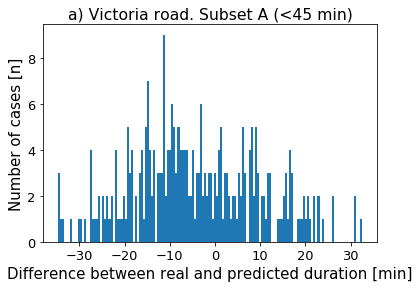

In [15]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 13})
import matplotlib 
plt.rc('axes', labelsize=15)
# matplotlib.rc('xtick', labelsize=13) 
# matplotlib.rc('ytick', labelsize=13) 
 

plt.hist(Yte-pred,bins=150)
plt.ylabel('Number of cases [n]')
plt.xlabel('Difference between real and predicted duration [min]')
plt.title('a) Victoria road. Subset A (<45 min)')
plt.savefig('aresid.pdf',format='pdf')

285

# San-Francisco

In [16]:
X,Y = getBFS(part=[2,40],dataset='sf')
# Y=np.log1p(Y)

In [17]:
cnd = X.monthidx >= (X.monthidx.max()-10)

Xtr = X[cnd]
Xte = X[~cnd]
Ytr = Y[cnd]
Yte = Y[~cnd]

In [21]:
import tqdm
import multiprocessing

REG = {'name':'XGB','instance':XGBRegressor,'param':{
            'learning_rate' : np.log(np.linspace(1.0001,2,50000)),#np.linspace(0.00001,0.9999,10000), 
            'n_estimators' : range(20,200,1),'objective':['reg:squarederror'],
            'max_depth':range(2,15,1), ##MAR: start at 3 
            'subsample':np.linspace(0.25, 1.0 ,10000),'colsample_bytree': np.linspace(0.01,0.9999,10000),
            'min_child_weight':np.arange(2,15),'n_jobs':[1],
#             'gamma':np.linspace(0,50,1000),
#             'reg_alpha':np.arange(0,15),'reg_lambda':np.arange(0,15)
}}

search = RandomizedSearchCV(estimator = REG['instance'](),
                   param_distributions=REG['param'],
                   n_iter=350,
                   scoring=make_scorer(mape, greater_is_better=False),
                   n_jobs=multiprocessing.cpu_count(), ## MAR: used to be 1
                   cv = 10,
                   verbose = 1
                       )
search.fit(Xtr, Ytr)
print(search.best_params_)

Fitting 10 folds for each of 350 candidates, totalling 3500 fits


[Parallel(n_jobs=56)]: Using backend LokyBackend with 56 concurrent workers.
[Parallel(n_jobs=56)]: Done  88 tasks      | elapsed:    0.3s
[Parallel(n_jobs=56)]: Done 1016 tasks      | elapsed:    1.8s
[Parallel(n_jobs=56)]: Done 2416 tasks      | elapsed:    3.8s


{'subsample': 0.9564956495649566, 'objective': 'reg:squarederror', 'n_jobs': 1, 'n_estimators': 84, 'min_child_weight': 14, 'max_depth': 12, 'learning_rate': 0.07873119041286854, 'colsample_bytree': 0.7649732373237323}


[Parallel(n_jobs=56)]: Done 3500 out of 3500 | elapsed:    6.0s finished
/home/agrigore/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [22]:
reg = REG['instance'](**search.best_params_)
    
reg.fit(Xtr, Ytr)
pred = np.array(reg.predict(Xte)).ravel()
# pred=np.expm1(pred)

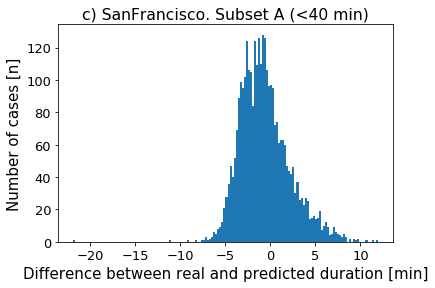

In [23]:
plt.rcParams.update({'font.size': 13})
import matplotlib 
plt.rc('axes', labelsize=15)

plt.hist(Yte-pred,bins=150)
plt.ylabel('Number of cases [n]')
plt.xlabel('Difference between real and predicted duration [min]')
plt.title('c) SanFrancisco. Subset A (<40 min)') #subsetA
plt.savefig('sfresid.pdf',format='pdf')

In [44]:
X,Y = getBFS(part=[2,55],dataset='m')
Y=np.log1p(Y)

In [45]:
cnd = X.Month >= (X.Month.max()-10)

Xtr = X[cnd]
Xte = X[~cnd]
Ytr = Y[cnd]
Yte = Y[~cnd]

In [46]:
import tqdm
import multiprocessing

REG = {'name':'XGB','instance':XGBRegressor,'param':{
            'learning_rate' : np.log(np.linspace(1.00001,1.3,100000)), 
            'n_estimators' : range(50,400,1),
            'max_depth':range(2,15,1), ##MAR: start at 3 
            'subsample':np.linspace(0.3, 1.0 ,10000),'colsample_bytree': np.linspace(0.0001,0.9999,10000),
            'min_child_weight':np.arange(2,31)
        }}

search = RandomizedSearchCV(estimator = REG['instance'](),
                   param_distributions=REG['param'],
                   n_iter=300,
                   scoring=make_scorer(mape, greater_is_better=False),
                   n_jobs=multiprocessing.cpu_count(), ## MAR: used to be 1
                   cv = 10,
                   verbose = 1
                       )
search.fit(Xtr, Ytr)
print(search.best_params_)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


[Parallel(n_jobs=56)]: Using backend LokyBackend with 56 concurrent workers.
[Parallel(n_jobs=56)]: Done  88 tasks      | elapsed:    1.4s
[Parallel(n_jobs=56)]: Done 564 tasks      | elapsed:    5.5s
[Parallel(n_jobs=56)]: Done 951 tasks      | elapsed:    8.4s
[Parallel(n_jobs=56)]: Done 1401 tasks      | elapsed:   12.2s
[Parallel(n_jobs=56)]: Done 1951 tasks      | elapsed:   18.5s
[Parallel(n_jobs=56)]: Done 2601 tasks      | elapsed:   25.8s
[Parallel(n_jobs=56)]: Done 3000 out of 3000 | elapsed:   30.4s finished


{'subsample': 0.7855685568556856, 'n_estimators': 338, 'min_child_weight': 14, 'max_depth': 4, 'learning_rate': 0.011116719058287382, 'colsample_bytree': 0.9804019501950195}


In [47]:
reg = REG['instance'](**search.best_params_)
    
reg.fit(Xtr, Ytr)
pred = np.array(reg.predict(Xte)).ravel()
pred=np.expm1(pred)

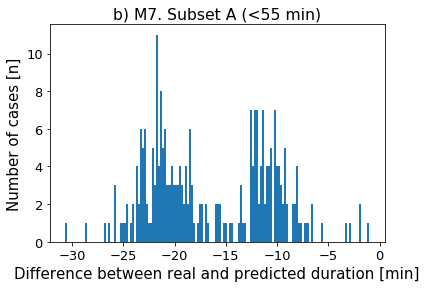

In [48]:
plt.rcParams.update({'font.size': 13})
import matplotlib 
plt.rc('axes', labelsize=15)

plt.hist(Yte-pred,bins=150)
plt.ylabel('Number of cases [n]')
plt.xlabel('Difference between real and predicted duration [min]')
plt.title('b) M7. Subset A (<55 min)') #, test set is the last 2 months of the year
plt.savefig('mresid.pdf',format='pdf')

In [27]:
print(len(Xtr), len(Xte))

4909 300


In [49]:
!tar -cf resid.tar *resid.pdf